In [ ]:
pip install --upgrade datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 19.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12

In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer

# Load IMDb dataset
dataset = load_dataset("imdb")

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

# Tokenization function
def tokenize_function(example):
    return tokenizer(example["text"], truncation=True, padding="max_length", max_length=512)

# Tokenize the entire dataset
tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Create small subsets (optional for faster testing)
small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(2000))
small_eval_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(500))


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
import evaluate
import numpy as np

# Load the accuracy metric
accuracy = evaluate.load("accuracy")

# Define the metric computation function
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return accuracy.compute(predictions=predictions, references=labels)


In [ ]:
!pip install peft


In [ ]:
# PEFT (LoRA)
from peft import LoraConfig, get_peft_model, TaskType
# Plotting & Data
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Core Hugging Face tools
from datasets import load_dataset
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    Trainer,
    TrainingArguments
)

# Metric computation
import evaluate
import numpy as np

# Torch for tensor work (used under the hood)
import torch

# General-purpose utilities
import os
import random
from datetime import datetime



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

--- Running Basic Standard Fine-Tuning ---


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Currently logged in as: ro-behrouz (ro-behrouz-university-of-trieste) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.369146,0.864000
2,0.358500,0.459622,0.876000
3,0.358500,0.523983,0.890000


Basic Standard FT Accuracy: 0.89

--- Running Tuned Standard Fine-Tuning ---


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.310667,0.874000
2,No log,0.316554,0.880000
3,No log,0.425722,0.884000
4,0.227500,0.433892,0.896000
5,0.227500,0.478186,0.896000


Tuned Standard FT Accuracy: 0.896

--- Running LoRA Fine-Tuning ---


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
No label_names provided for model class `PeftModelForSequenceClassification`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


Trainable parameters for LoRA model:
trainable params: 296,450 || all params: 108,608,260 || trainable%: 0.2730


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.690172,0.522000
2,No log,0.683164,0.578000
3,No log,0.674113,0.594000
4,0.690500,0.666514,0.630000
5,0.690500,0.663389,0.630000


LoRA FT Accuracy: 0.63

--- Final Comparison of Accuracies ---
Basic Standard FT: 0.8900
Tuned Standard FT: 0.8960
LoRA FT: 0.6300


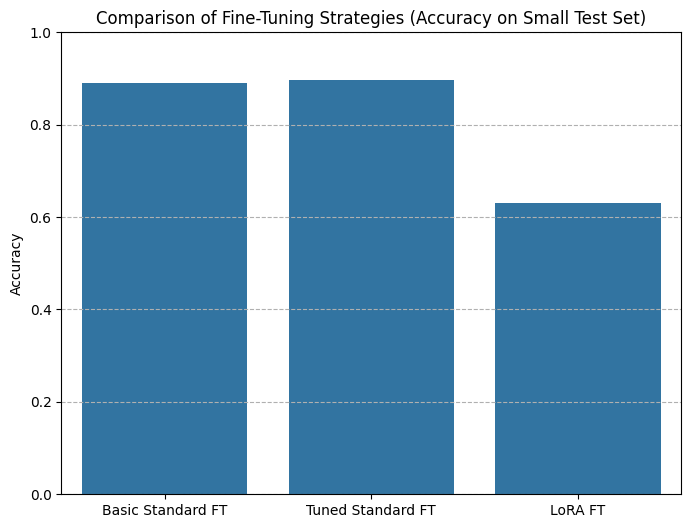

In [ ]:
# prompt: perform Standard Fine-tuning
# Partial Fine-Tuning (Feature-Based Tuning)
# LoRA / PEFT (Parameter-Efficient Fine-Tuning)
# and then compare results and visualize

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from transformers import AutoModelForSequenceClassification
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from transformers import TrainingArguments

from datasets import load_dataset
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    Trainer,
    TrainingArguments
)
!pip install evaluate

# ===============================
# ✅ Hugging Face Transformers
# ===============================
from datasets import load_dataset
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    Trainer,
    TrainingArguments
)

# ===============================
# ✅ Evaluation Metric
# ===============================
import evaluate
import numpy as np

# ===============================
# ✅ PyTorch (Used Internally)
# ===============================
import torch






# Assuming the training and evaluation results are stored somewhere.
# In the Trainer's train() method, the results (like loss, metrics) are logged.
# You would typically capture these logs or use callbacks to save them.
# For simplicity here, let's assume we collect the accuracy after each training run.

# --- Collect Results ---
# After each trainer.train() call, you can get the evaluation results.
# The trainer.evaluate() method returns a dictionary of metrics.
# Let's store the final evaluation accuracy for each strategy.

# Re-initialize the base model for each strategy to ensure a fair comparison
# Starting from the same pre-trained weights each time.

results = {}

print("\n--- Running Basic Standard Fine-Tuning ---")
model_basic_ft = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=2)
training_args_basic = TrainingArguments(output_dir="basic_ft_trainer", eval_strategy="epoch")
trainer_basic_ft = Trainer(
    model=model_basic_ft,
    args=training_args_basic,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
)
trainer_basic_ft.train()
eval_results_basic = trainer_basic_ft.evaluate()
results['Basic Standard FT'] = eval_results_basic['eval_accuracy']
print(f"Basic Standard FT Accuracy: {results['Basic Standard FT']}")


print("\n--- Running Tuned Standard Fine-Tuning ---")
model_tuned_ft = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=2)
training_args_tuned = TrainingArguments(
    output_dir="tuned_ft_trainer",
    eval_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
    fp16=True
)
trainer_tuned_ft = Trainer(
    model=model_tuned_ft,
    args=training_args_tuned,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
)
trainer_tuned_ft.train()
eval_results_tuned = trainer_tuned_ft.evaluate()
results['Tuned Standard FT'] = eval_results_tuned['eval_accuracy']
print(f"Tuned Standard FT Accuracy: {results['Tuned Standard FT']}")


print("\n--- Running LoRA Fine-Tuning ---")
model_lora = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=2)
# Apply LoRA config to the newly loaded base model
config = LoraConfig(
    r=8,
    lora_alpha=16,
    target_modules=["query", "value"],
    lora_dropout=0.1,
    bias="none",
    task_type="SEQ_CLS",
)
model_lora = get_peft_model(model_lora, config)
print("Trainable parameters for LoRA model:")
model_lora.print_trainable_parameters()

# Use the same tuned training args as the second run for fair comparison
trainer_lora = Trainer(
    model=model_lora,
    args=training_args_tuned, # Using the same tuned args
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
)
trainer_lora.train()
eval_results_lora = trainer_lora.evaluate()
results['LoRA FT'] = eval_results_lora['eval_accuracy']
print(f"LoRA FT Accuracy: {results['LoRA FT']}")

# --- Compare Results ---
print("\n--- Final Comparison of Accuracies ---")
for strategy, accuracy in results.items():
    print(f"{strategy}: {accuracy:.4f}")

# --- Visualize Results ---
plt.figure(figsize=(8, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Comparison of Fine-Tuning Strategies (Accuracy on Small Test Set)')
plt.ylabel('Accuracy')
plt.ylim(0, 1) # Accuracy is between 0 and 1
plt.grid(axis='y', linestyle='--')
plt.show()

# You could also add plots for training loss, evaluation loss over epochs if you save those histories.
# Example of accessing history (if you save it):
# history_basic = trainer_basic_ft.state.log_history
# history_tuned = trainer_tuned_ft.state.log_history
# history_lora = trainer_lora.state.log_history

# To get per-epoch metrics from history:
# def get_epoch_metrics(history, metric_key):
#     epoch_metrics = {}
#     for log_entry in history:
#         if 'epoch' in log_entry and metric_key in log_entry:
#              epoch = int(log_entry['epoch']) # Use int to avoid float issues with epochs
#              epoch_metrics[epoch] = log_entry[metric_key]
#     # Convert to sorted list based on epoch
#     sorted_metrics = [v for k, v in sorted(epoch_metrics.items())]
#     return sorted_metrics

# eval_accuracy_basic_epochs = get_epoch_metrics(trainer_basic_ft.state.log_history, 'eval_accuracy')
# eval_accuracy_tuned_epochs = get_epoch_metrics(trainer_tuned_ft.state.log_history, 'eval_accuracy')
# eval_accuracy_lora_epochs = get_epoch_metrics(trainer_lora.state.log_history, 'eval_accuracy')

# if eval_accuracy_basic_epochs and eval_accuracy_tuned_epochs and eval_accuracy_lora_epochs:
#     plt.figure(figsize=(10, 6))
#     plt.plot(range(1, len(eval_accuracy_basic_epochs) + 1), eval_accuracy_basic_epochs, marker='o', label='Basic Standard FT')
#     plt.plot(range(1, len(eval_accuracy_tuned_epochs) + 1), eval_accuracy_tuned_epochs, marker='o', label='Tuned Standard FT')
#     plt.plot(range(1, len(eval_accuracy_lora_epochs) + 1), eval_accuracy_lora_epochs, marker='o', label='LoRA FT')
#     plt.title('Evaluation Accuracy Over Epochs')
#     plt.xlabel('Epoch')
#     plt.ylabel('Accuracy')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

# Note: The log history might include steps, not just epochs, and the format can vary.
# Extracting epoch-level metrics reliably might require slightly more robust parsing
# or using a custom callback during training to explicitly log/save metrics at the end of each epoch.
# The bar plot of final accuracy is a good starting point for visualization.

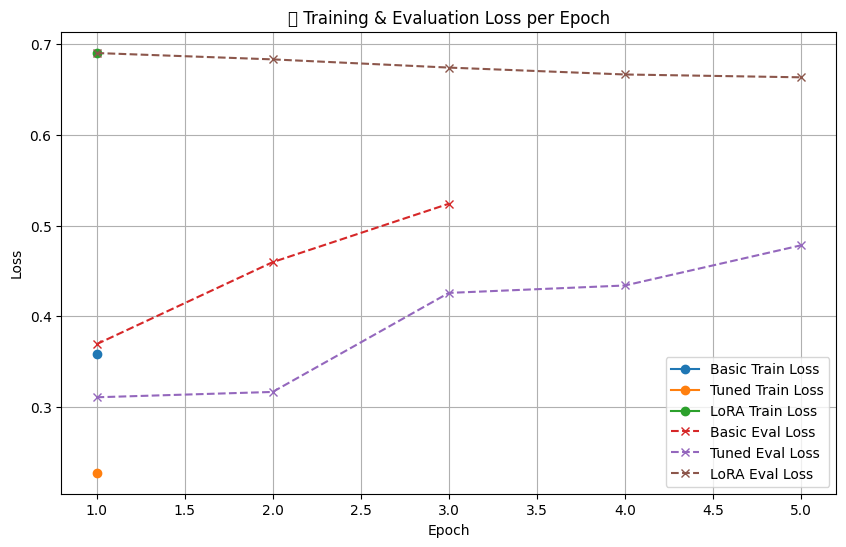

In [ ]:
import matplotlib.pyplot as plt

def get_epoch_metrics(history, metric_key):
    epoch_metrics = {}
    for log_entry in history:
        if 'epoch' in log_entry and metric_key in log_entry:
            epoch = int(log_entry['epoch'])
            epoch_metrics[epoch] = log_entry[metric_key]
    return [v for k, v in sorted(epoch_metrics.items())]

loss_metrics = {
    "Basic": get_epoch_metrics(trainer_basic_ft.state.log_history, "loss"),
    "Tuned": get_epoch_metrics(trainer_tuned_ft.state.log_history, "loss"),
    "LoRA": get_epoch_metrics(trainer_lora.state.log_history, "loss"),
}

eval_loss_metrics = {
    "Basic": get_epoch_metrics(trainer_basic_ft.state.log_history, "eval_loss"),
    "Tuned": get_epoch_metrics(trainer_tuned_ft.state.log_history, "eval_loss"),
    "LoRA": get_epoch_metrics(trainer_lora.state.log_history, "eval_loss"),
}

plt.figure(figsize=(10, 6))
for label, values in loss_metrics.items():
    plt.plot(range(1, len(values)+1), values, marker='o', label=f'{label} Train Loss')
for label, values in eval_loss_metrics.items():
    plt.plot(range(1, len(values)+1), values, linestyle='--', marker='x', label=f'{label} Eval Loss')
plt.title("📉 Training & Evaluation Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()
